<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 7</b></center>    
<pre>    

### Namra Pithwa
### 23010101641
### 17/01/2025

# Ml Algorithm Comparison

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the diabetes dataset

In [4]:
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Prepare the dataset

In [5]:
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})  # Encode target variable

# Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the models

In [7]:
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results

In [8]:
results = {}

# Train and evaluate each model

In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    if name == "Linear Regression":
        # Linear Regression uses regression metrics
        y_pred = np.round(model.predict(X_test))  # Round predictions to nearest class
        mse = mean_squared_error(y_test, y_pred)
        results[name] = {
            "Metric": "Mean Squared Error",
            "Value": mse
        }
    else:
        # Classification metrics
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            "Metric": "Accuracy",
            "Value": accuracy
        }

# Display the results as a DataFrame

In [10]:
results_df = pd.DataFrame(results).T
print(results_df)

                               Metric     Value
Naive Bayes                  Accuracy  0.766234
SVM                          Accuracy  0.753247
Linear Regression  Mean Squared Error   0.24026
Decision Tree                Accuracy  0.746753


# Visualize the results

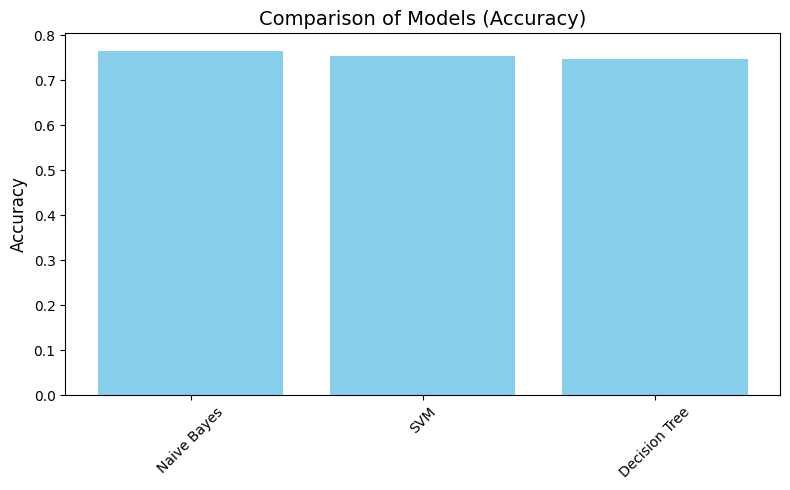

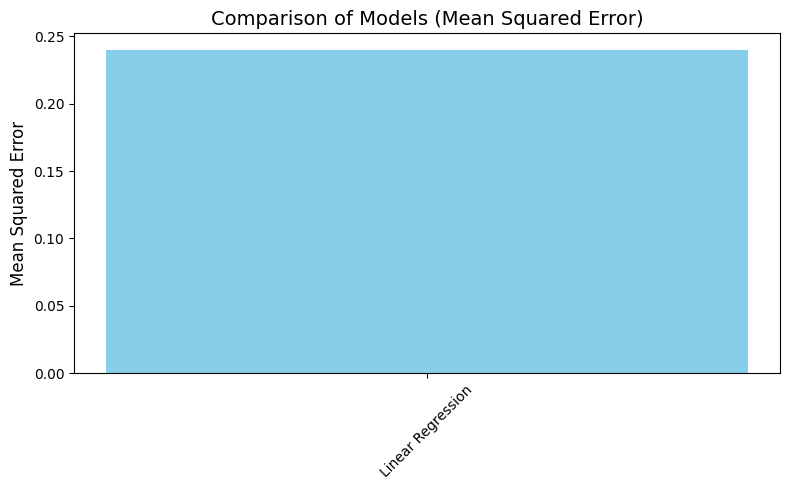

In [11]:
metrics = results_df["Metric"].unique()
for metric in metrics:
    filtered_results = results_df[results_df["Metric"] == metric]
    plt.figure(figsize=(8, 5))
    plt.bar(filtered_results.index, filtered_results["Value"], color='skyblue')
    plt.title(f"Comparison of Models ({metric})", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
